### Deadline

Wednesday October 25, 2017 at 11:59PM

### Important Notes

Make sure you push on GitHub your Notebook with all the cells already evaluated (i.e., you don't want your colleagues to generate unnecessary Web traffic during the peer review)
Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
Please write all your comments in English, and use meaningful variable names in your code.
Background

In this homework we will extract interesting information from www.topuniversities.com and www.timeshighereducation.com, two platforms that maintain a global ranking of worldwide universities. This ranking is not offered as a downloadable dataset, so you will have to find a way to scrape the information we need! You are not allowed to download manually the entire ranking -- rather you have to understand how the server loads it in your browser. For this task, Postman with the Interceptor extension can help you greatly. We recommend that you watch this brief tutorial to understand quickly how to use it.

### Assignment

Obtain the 200 top-ranking universities in www.topuniversities.com (ranking 2018). In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total). Some information is not available in the main list and you have to find them in the details page. Store the resulting dataset in a pandas DataFrame and answer the following questions:
Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
Answer the previous question aggregating the data by (c) country and (d) region.
Plot your data using bar charts and describe briefly what you observed.

Obtain the 200 top-ranking universities in www.timeshighereducation.com (ranking 2018). Repeat the analysis of the previous point and discuss briefly what you observed.

Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

Can you find the best university taking in consideration both rankings? Explain your approach.

### Hints:

Keep your Notebook clean and don't print the verbose output of the requests if this does not add useful information for the reader.
In case of tie, use the order defined in the webpage.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
import requests
from bs4 import BeautifulSoup

r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt')
df=pd.DataFrame(r.json()['data'])[['title','country','region','url']].loc[range(0,200)]

In [68]:
def get_numbers(soup):
    try:
        number_staff_total = soup.find('div', class_='faculty-main wrapper col-md-4').find('div', class_='total faculty').find('div', class_='number').text.strip(' ').strip('\n').replace(',','')
    except AttributeError : number_staff_total = '0' 
    try:
        number_staff_inter = soup.find('div', class_='faculty-main wrapper col-md-4').find('div', class_='inter faculty').find('div', class_='number').text.strip(' ').strip('\n').replace(',','')
    except AttributeError :  number_staff_inter = 0
    try:
        number_student_total = soup.find('div', class_='students-main wrapper col-md-4').find('div', class_='number').text.strip(' ').strip('\n').replace(',','')
    except AttributeError :  number_student_total = '0'
    try:
        number_student_inter = soup.find('div', class_='int-students-main wrapper col-md-4').find('div', class_='number').text.strip(' ').strip('\n').replace(',','')       
    except AttributeError: number_student_inter = '0' 
                                                                                                                                              
    return pd.Series([number_staff_total, number_staff_inter, number_student_total, number_student_inter])

df_numbers_info=pd.DataFrame()

serie_staff_total=pd.Series()
serie_staff_inter=pd.Series()
serie_student_total=pd.Series()
serie_student_inter=pd.Series()

for link_uni in df['url']:
    r=requests.get('https://www.topuniversities.com'+link_uni)
    soup = BeautifulSoup(r.text, 'html.parser')
    serie=get_numbers(soup)
    serie_staff_total=serie_staff_total.append(pd.Series(serie[0])) 
    serie_staff_inter=serie_staff_inter.append(pd.Series(serie[1])) 
    serie_student_total=serie_student_total.append(pd.Series(serie[2])) 
    serie_student_inter=serie_student_inter.append(pd.Series(serie[3])) 

df['Total staffs']=serie_staff_total.values
df['Total international staffs']=serie_staff_inter.values
df['Total students']=serie_student_total.values
df['Total international students']=serie_student_inter.values

df.set_index('title')

,country,region,url,Total staffs,Total international staffs,Total students,Total international students
title,,,,,,,
Massachusetts Institute of Technology (MIT),United States,North America,/universities/massachusetts-institute-technolo...,2982,1679,11067,3717
Stanford University,United States,North America,/universities/stanford-university,4285,2042,15878,3611
Harvard University,United States,North America,/universities/harvard-university,4350,1311,22429,5266
California Institute of Technology (Caltech),United States,North America,/universities/california-institute-technology-...,953,350,2255,647
University of Cambridge,United Kingdom,Europe,/universities/university-cambridge,5490,2278,18770,6699
University of Oxford,United Kingdom,Europe,/universities/university-oxford,6750,2964,19720,7353
UCL (University College London),United Kingdom,Europe,/universities/ucl-university-college-london,6345,2554,31080,14854
Imperial College London,United Kingdom,Europe,/universities/imperial-college-london,3930,2071,16090,8746
University of Chicago,United States,North America,/universities/university-chicago,2449,635,13557,3379


In [69]:
df['ratio international/total']=pd.Series(list(map(lambda x: int(x), df['Total international students']))).divide(pd.Series(list(map(lambda x: int(x), df['Total students'])))).round(3)
df['ratio student:staff']=pd.Series(list(map(lambda x: int(x), df['Total students']))).divide(pd.Series(list(map(lambda x: int(x), df['Total staffs'])))).round(3)

df.head(10)

,title,country,region,url,Total staffs,Total international staffs,Total students,Total international students,ratio international/total,ratio student:staff
0,Massachusetts Institute of Technology (MIT),United States,North America,/universities/massachusetts-institute-technolo...,2982,1679,11067,3717,0.336,3.711
1,Stanford University,United States,North America,/universities/stanford-university,4285,2042,15878,3611,0.227,3.705
2,Harvard University,United States,North America,/universities/harvard-university,4350,1311,22429,5266,0.235,5.156
3,California Institute of Technology (Caltech),United States,North America,/universities/california-institute-technology-...,953,350,2255,647,0.287,2.366
4,University of Cambridge,United Kingdom,Europe,/universities/university-cambridge,5490,2278,18770,6699,0.357,3.419
5,University of Oxford,United Kingdom,Europe,/universities/university-oxford,6750,2964,19720,7353,0.373,2.921
6,UCL (University College London),United Kingdom,Europe,/universities/ucl-university-college-london,6345,2554,31080,14854,0.478,4.898
7,Imperial College London,United Kingdom,Europe,/universities/imperial-college-london,3930,2071,16090,8746,0.544,4.094
8,University of Chicago,United States,North America,/universities/university-chicago,2449,635,13557,3379,0.249,5.536
9,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland,Europe,/universities/eth-zurich-swiss-federal-institu...,2477,1886,19815,7563,0.382,8.000


In [70]:
df1=df.sort_values("ratio international/total", ascending=False).copy()
df1.set_index('title', inplace=True)
df1=df1[['ratio international/total']]
df1.head(10)

,ratio international/total
title,
London School of Economics and Political Science (LSE),0.691
Ecole Polytechnique Fédérale de Lausanne (EPFL),0.570
Imperial College London,0.544
Maastricht University,0.503
UCL (University College London),0.478
Carnegie Mellon University,0.478
University of St Andrews,0.458
The University of Melbourne,0.427
Queen Mary University of London,0.422


In [71]:
df2=df.sort_values("ratio student:staff", ascending=True).copy()
df2.set_index('title', inplace=True)
df2=df2[['ratio student:staff']]
df2.head(10)


,ratio student:staff
title,
California Institute of Technology (Caltech),2.366
Yale University,2.511
University of Oxford,2.921
University of Cambridge,3.419
Johns Hopkins University,3.619
Stanford University,3.705
Massachusetts Institute of Technology (MIT),3.711
University of Rochester,3.751
University of Pennsylvania,3.753


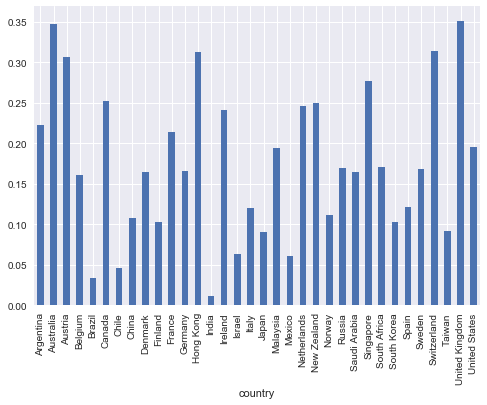

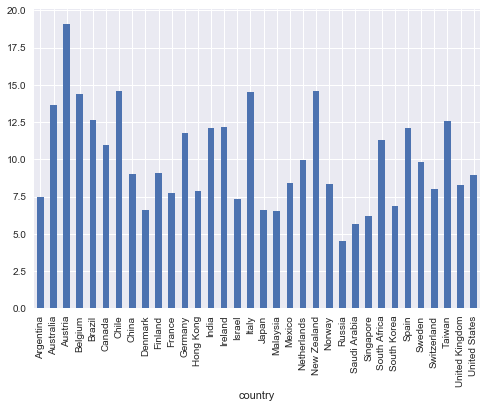

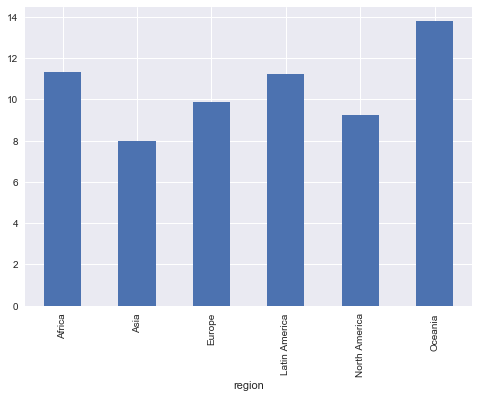

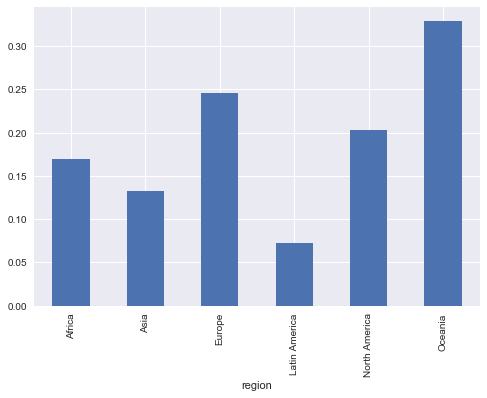

In [72]:
group=df.groupby('country')
group.aggregate(np.mean)['ratio international/total'].plot.bar()
plt.show()
group.aggregate(np.mean)['ratio student:staff'].plot.bar()
plt.show()

group=df.groupby('region')
group.aggregate(np.mean)['ratio student:staff'].plot.bar()
plt.show()
group.aggregate(np.mean)['ratio international/total'].plot.bar()
plt.show()

In [73]:
r1=requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
data=pd.DataFrame(r1.json()['data'])[['name', 'location', 'stats_pc_intl_students', 'stats_student_staff_ratio']].loc[range(0,200)]
print(data)
data['stats_pc_intl_students']=pd.Series(list(map(lambda x : int(x.strip('%'))/100, data['stats_pc_intl_students'])))
data['stats_student_staff_ratio']=pd.Series(list(map(lambda x : float(x), data['stats_student_staff_ratio'])))


sort_pc_intl=data[['name', 'stats_pc_intl_students']].copy()
sort_pc_intl=sort_pc_intl.sort_values('stats_pc_intl_students', ascending=False).set_index('name')
sort_pc_intl.head(10)


                                                  name            location  \
0                                 University of Oxford      United Kingdom   
1                              University of Cambridge      United Kingdom   
2                   California Institute of Technology       United States   
3                                  Stanford University       United States   
4                Massachusetts Institute of Technology       United States   
5                                   Harvard University       United States   
6                                 Princeton University       United States   
7                              Imperial College London      United Kingdom   
8                                University of Chicago       United States   
9    ETH Zurich – Swiss Federal Institute of Techno...         Switzerland   
10                          University of Pennsylvania       United States   
11                                     Yale University       Uni

,stats_pc_intl_students
name,
London School of Economics and Political Science,0.71
University of Luxembourg,0.57
École Polytechnique Fédérale de Lausanne,0.55
Imperial College London,0.55
Maastricht University,0.50
University College London,0.49
University of St Andrews,0.48
Carnegie Mellon University,0.45
Queen Mary University of London,0.45


In [74]:
sort_student_staff =data[['name', 'stats_student_staff_ratio']].copy()
sort_student_staff['stats_student_staff_ratio']=pd.Series(list(map(lambda x : float(x), sort_student_staff['stats_student_staff_ratio'])))
sort_student_staff=sort_student_staff.sort_values('stats_student_staff_ratio', ascending=True).set_index('name')
sort_student_staff.head(10)

,stats_student_staff_ratio
name,
Vanderbilt University,3.3
University of Copenhagen,4.1
Johns Hopkins University,4.3
Yale University,4.3
University of Rochester,4.3
Emory University,4.4
Duke University,4.5
École Polytechnique,5.1
Scuola Normale Superiore di Pisa,5.2


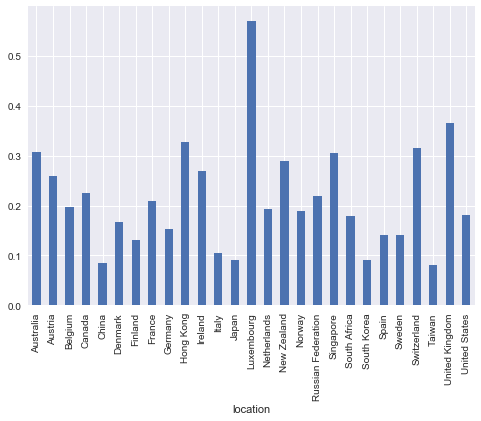

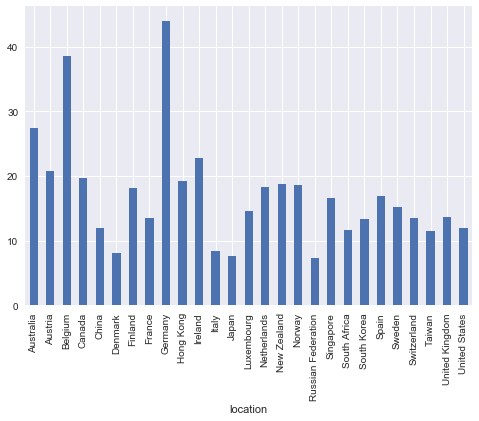

In [75]:
group=data.groupby('location')
group.aggregate(np.mean)['stats_pc_intl_students'].plot.bar()
plt.show()
group.aggregate(np.mean)['stats_student_staff_ratio'].plot.bar()
plt.show()

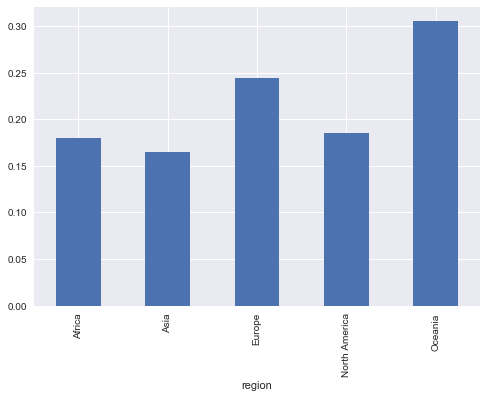

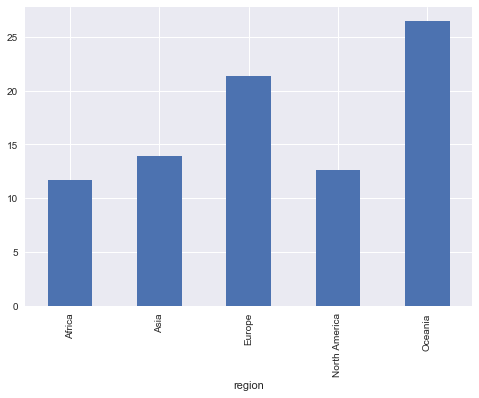

In [76]:
dic_map=df[['country','region']].set_index('country').to_dict()['region']
dic_map['Luxembourg']='Europe'
dic_map['Russian Federation']='Europe'

df_region = data[['name', 'location', 'stats_pc_intl_students', 'stats_student_staff_ratio']]
df_region['region']=df_region['location'].map(dic_map)

group_region=df_region.groupby('region')
df_region=group_region.aggregate(np.mean)

df_region['stats_pc_intl_students'].plot.bar()
plt.show()
df_region['stats_student_staff_ratio'].plot.bar()
plt.show()

In [236]:
#Exercice 3
#The goal of this exercise is to merge the 2 dataframe on the university names
#The issue is that many university don't have the exact same name in both ranking
#The strategy of this algorithm is to have at least 2 common key words in the 2 universities to match them
#An other issue with that strategy is that a lot of university that does not correspond would match
#A basic exemple of that would be 'Hong Kong University of Science and Technology' and 'Massachusset Institute of Technology'
#Have both 2 common words : 'of' and 'Technology'
#To fix this problem, some special words like 'of', 'College', 'de', etc. are removed from the university name
#Finally every university of the first ranking is compared to each university of the second. If a match is found, the
#university name of the first ranking is overwritten with the name of the second ranking
#At the end the university are merged by name
#There are a few special case that have to be treated manually with this strategy
#The flaw of this strategy is that we loose the exact university name 
#(ex: Massachusset Institute of Technology becomes Massachusset Technology)

#Obtain the important data of the 2 rankings
Rank1=df[['title','ratio international/total','ratio student:staff']].copy()
Rank1['Rank1']=pd.Series(range(1,200)).astype('int')
Rank2=data[['name', 'stats_pc_intl_students', 'stats_student_staff_ratio']]
Rank2['Rank2']=pd.Series(range(1,200)).astype('int')
Rank2=Rank2.rename(columns={'name':'title'})

#This function return the number of common words in the 2 strings
def nb_common_string(string1, string2):  
    list1=string1.split()
    list2=string2.split()
    return len(set(list1).intersection(list2))

#this function treat university names to have 2 unique word for each corresponding university in each ranking
def treat_university(uni):
    if('State' in uni.split()): #avoid confustion like 'University of Pennsylvania' and 'Pensilvania state University'
        uni=uni.replace('University', '')   
    uni=uni.replace('- ','')
    uni=uni.replace(',','')
    uni=uni.replace('(','')
    uni=uni.replace(')','')
    uni=uni.replace('of ','')
    uni=uni.replace('Swiss ','')
    uni=uni.replace('Hong Kong','Hong_Kong') #Allow to count Hong Kong as 1 word
    uni=uni.replace('The ','')
    uni=uni.replace('Federal ','')
    uni=uni.replace('\'','')
    uni=uni.replace('’','')
    uni=uni.replace('and ','')
    uni=uni.replace('&','')
    uni=uni.replace('École', 'Ecole')
    uni=uni.replace('Ludwig-Maximilians-Universität München', 'LMU Munich')
    uni=uni.replace('Ruprecht-Karls-Universität Heidelberg', 'Heidelberg University')   
    if len(uni.split())>2 and ('College' not in uni.split()): #Dont remove University for case of type "University of ..." and "University ... College ..."
       uni=uni.replace('University','')
    if('Institute' not in uni.split()): #allow to have 2 words in common in second ranking (Massachusset Institute of Technology)
        uni=uni.replace('Technology','')
    uni=uni.replace('Institute ','')
    if('Hong_Kong' in uni.split()): 
        uni=uni.replace('University','')       
    uni=uni.replace('College ','')
    uni=uni.replace('de ','')    
    if(uni=="Ecole Polytechnique"): #Special case of "Ecole Polytechnique" to not confuse with "Ecole Polytechnique Federal de Lausanne"
        uni="École Polytechnique Paris"
    return uni

#This function has 2 list in parameters : list1 and list2
#return list1 that contain the exact same university names as list2
def rename_list1_as_list2(list1, list2, nb_common_str):   
    for elem1 in list1:
        for elem2 in list2:
            if nb_common_string(elem1, elem2) >= nb_common_str:
                list1[list1.index(elem1)]=list2[list2.index(elem2)]
                break
    return list1

#Treat university names in the ranking to match them
Rank1['title']=pd.Series(list(map(lambda x: treat_university(x), Rank1['title'].tolist())))
Rank2['title']=pd.Series(list(map(lambda x: treat_university(x), Rank2['title'].tolist())))

#Modify the university names of rank one to make them correspond to rank 2
Rank1['title']=pd.Series(rename_list1_as_list2(Rank1['title'].tolist(), Rank2['title'].tolist(), 2))

#Merge the 2 dataframes
mergedRanking=pd.merge(Rank1,Rank2, on='title', how='outer') 
mergedRanking.head(30)

,title,ratio international/total,ratio student:staff,Rank1,stats_pc_intl_students,stats_student_staff_ratio,Rank2
0,Massachusetts Technology,0.336,3.711,1.0,0.34,8.7,5.0
1,Stanford University,0.227,3.705,2.0,0.22,7.5,4.0
2,Harvard University,0.235,5.156,3.0,0.26,8.9,6.0
3,California Technology,0.287,2.366,4.0,0.27,6.5,3.0
4,University Cambridge,0.357,3.419,5.0,0.35,10.9,2.0
5,University Oxford,0.373,2.921,6.0,0.38,11.2,1.0
6,University London,0.478,4.898,7.0,0.49,10.5,16.0
7,Imperial London,0.544,4.094,8.0,0.55,11.4,8.0
8,University Chicago,0.249,5.536,9.0,0.25,6.2,9.0
9,ETH Zurich – Technology Zurich,0.382,8.000,10.0,0.38,14.6,10.0
